# HOUSING SALES PRICE PREDICTION OF AMES, IOWA

### Business Problem
#### When we ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. There are a lot of features to be considered before one can set the price or start negotiating. The project aims in creating a model for predicting housing sales price for Ames, Iowa considering all the important features including the neighborhood venues

### Target Audience
•	House aspirants who can roughly estimate the value of a house based on its features and the average price.  
•	Real estate people and city planners who can decide what kind of venues to put around their products to maximize selling price.  
•	House sellers who can optimize their advertisements.


### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.regressor import StackingCVRegressor
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

print('Libraries imported')

Libraries imported


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing the Ames Housing dataset downloaded from kaggle.com 

In [2]:
traindf = pd.read_csv('train.csv')
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
Neighdf = pd.DataFrame(traindf['Neighborhood'].unique())

#### In the Ames housing dataset, each neighborhood is given a code, for example 'Blmngtn' was given for 'Bloomington Rd' and stored in Neighdf

In [4]:
Neighdf.columns = ['Neighborhood']
Neighdf

,Neighborhood
0,CollgCr
1,Veenker
2,Crawfor
3,NoRidge
4,Mitchel
5,Somerst
6,NWAmes
7,OldTown
8,BrkSide
9,Sawyer


In [0]:
latitude = []
longitude = []
for address in Neighdf['Neighborhood']:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:  
        latitude.append('Not found')
        longitude.append('Not found')

In [6]:
Neighdf['Latitude'] = latitude
Neighdf['Longitude'] = longitude
Neighdf

,Neighborhood,Latitude,Longitude
0,CollgCr,Not found,Not found
1,Veenker,42.038,-93.6508
2,Crawfor,-32.3675,152.103
3,NoRidge,26.5892,-81.6279
4,Mitchel,28.0913,-97.2158
5,Somerst,44.2725,-88.342
6,NWAmes,Not found,Not found
7,OldTown,48.1788,-117.038
8,BrkSide,Not found,Not found
9,Sawyer,37.4972,-98.6823


#### Using the code directly ‘geocode’ could not translate it onto the required latitude and longitude. Further data was given in ‘kaggle.com’ describing the neighborhood code into neighborhood name. Same was extracted and made into a Data frame which was passed into ‘geocoder’ for translation after concatenating ‘Ames,Iowa’

In [0]:
      dict1 ={ 'Blmngtn': 'Bloomington Rd',
       'Blueste' : 'Bluestem',
       'BrDale' : 'Briardale',
       'BrkSide' : 'Brookside',
       'ClearCr' : 'Clear Creek',
       'CollgCr' : 'College Creek',
       'Crawfor' : 'Crawford',
       'Edwards' : 'Edwards',
       'Gilbert' : 'Gilbert',
       'IDOTRR' : 'Iowa DOT and Rail Road',
       'MeadowV' : 'Meadow Village',
       'Mitchel' : 'Mitchell',
       'Names' : 'North Ames',
       'NoRidge' : 'Northridge',
       'NPkVill' : 'Northpark Villa',
       'NridgHt' : 'Northridge Heights',
       'NWAmes' : 'Northwest Ames',
       'OldTown' : 'Old Town',
       'SWISU' : 'South & West of Iowa State University',
       'Sawyer' : 'Sawyer',
       'SawyerW' : 'Sawyer West',
       'Somerst' : 'Somerset',
       'StoneBr' : 'Stone Brook',
       'Timber' : 'Timberland',
       'Veenker' : 'Veenker'}

In [8]:
Neigh_df = pd.DataFrame()
Neigh_df['Neighborhood'] = dict1.keys()
Neigh_df['Neigh'] = dict1.values()
Neigh_df

,Neighborhood,Neigh
0,Blmngtn,Bloomington Rd
1,Blueste,Bluestem
2,BrDale,Briardale
3,BrkSide,Brookside
4,ClearCr,Clear Creek
5,CollgCr,College Creek
6,Crawfor,Crawford
7,Edwards,Edwards
8,Gilbert,Gilbert
9,IDOTRR,Iowa DOT and Rail Road


In [9]:
Neigh_df['Neigh'] = Neigh_df['Neigh'] + ',Ames,Iowa'
Neigh_df

,Neighborhood,Neigh
0,Blmngtn,"Bloomington Rd,Ames,Iowa"
1,Blueste,"Bluestem,Ames,Iowa"
2,BrDale,"Briardale,Ames,Iowa"
3,BrkSide,"Brookside,Ames,Iowa"
4,ClearCr,"Clear Creek,Ames,Iowa"
5,CollgCr,"College Creek,Ames,Iowa"
6,Crawfor,"Crawford,Ames,Iowa"
7,Edwards,"Edwards,Ames,Iowa"
8,Gilbert,"Gilbert,Ames,Iowa"
9,IDOTRR,"Iowa DOT and Rail Road,Ames,Iowa"


In [0]:
latitude = []
longitude = []
for address in Neigh_df['Neigh']:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:  
        latitude.append('Not found')
        longitude.append('Not found')


In [11]:
Neigh_df['Latitude'] = latitude
Neigh_df['Longitude'] = longitude
Neigh_df

,Neighborhood,Neigh,Latitude,Longitude
0,Blmngtn,"Bloomington Rd,Ames,Iowa",42.056,-93.6255
1,Blueste,"Bluestem,Ames,Iowa",42.0112,-93.6451
2,BrDale,"Briardale,Ames,Iowa",Not found,Not found
3,BrkSide,"Brookside,Ames,Iowa",42.0268,-93.6171
4,ClearCr,"Clear Creek,Ames,Iowa",41.7876,-93.267
5,CollgCr,"College Creek,Ames,Iowa",42.0206,-93.6931
6,Crawfor,"Crawford,Ames,Iowa",42.028,-93.6072
7,Edwards,"Edwards,Ames,Iowa",42.0258,-93.6686
8,Gilbert,"Gilbert,Ames,Iowa",Not found,Not found
9,IDOTRR,"Iowa DOT and Rail Road,Ames,Iowa",Not found,Not found


#### Still there were locations such as BrDale, Gilbert, IDOTRR, Npkvil, OldTown, SWISU whose translation could not be run by ‘geocoder’. These were searched in the web and following actions were taken:  
•	If the name is different, decide which one to use after searching on the internet.  
•	If the neighborhood is missing from the geo data frame, add it's coordinate.  
•	If the neighborhood is made up, combine them into the larger neighborhood which exist in the geo data frame.


In [12]:
Neigh_df.at[2, 'Neigh'] = 'North Grand mall,Ames,Iowa' #Nearest place to BrDale

Neigh_df.at[8, 'Neigh'] = 'Zenorsville,Ames,Iowa' #Nearest place to Gilbert

Neigh_df.at[9, 'Neigh'] = 'Ames,Ames,Iowa' #Nearest place to IDOTRR

Neigh_df.at[14, 'Neigh'] = 'Ames,Ames,Iowa' #Nearest place to Npkvil

Neigh_df.at[17, 'Neigh'] = 'Downtown Ames,Ames,Iowa' #Nearest place to OldTown

Neigh_df.at[18, 'Neigh'] = 'Iowa State University,Ames,Iowa' #Nearest place to Gilbert

Neigh_df


,Neighborhood,Neigh,Latitude,Longitude
0,Blmngtn,"Bloomington Rd,Ames,Iowa",42.056,-93.6255
1,Blueste,"Bluestem,Ames,Iowa",42.0112,-93.6451
2,BrDale,"North Grand mall,Ames,Iowa",Not found,Not found
3,BrkSide,"Brookside,Ames,Iowa",42.0268,-93.6171
4,ClearCr,"Clear Creek,Ames,Iowa",41.7876,-93.267
5,CollgCr,"College Creek,Ames,Iowa",42.0206,-93.6931
6,Crawfor,"Crawford,Ames,Iowa",42.028,-93.6072
7,Edwards,"Edwards,Ames,Iowa",42.0258,-93.6686
8,Gilbert,"Zenorsville,Ames,Iowa",Not found,Not found
9,IDOTRR,"Ames,Ames,Iowa",Not found,Not found


In [0]:
latitude = []
longitude = []
for address in Neigh_df['Neigh']:
    try:
        geolocator = Nominatim(user_agent="ames_explorer")
        location = geolocator.geocode(address)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:  
        latitude.append('Not found')
        longitude.append('Not found')

In [14]:
Neigh_df['Latitude'] = latitude
Neigh_df['Longitude'] = longitude
Neigh_df

,Neighborhood,Neigh,Latitude,Longitude
0,Blmngtn,"Bloomington Rd,Ames,Iowa",42.056049,-93.625519
1,Blueste,"Bluestem,Ames,Iowa",42.011170,-93.645063
2,BrDale,"North Grand mall,Ames,Iowa",42.049331,-93.622661
3,BrkSide,"Brookside,Ames,Iowa",42.026770,-93.617055
4,ClearCr,"Clear Creek,Ames,Iowa",41.787650,-93.267011
5,CollgCr,"College Creek,Ames,Iowa",42.020616,-93.693098
6,Crawfor,"Crawford,Ames,Iowa",42.028029,-93.607151
7,Edwards,"Edwards,Ames,Iowa",42.025819,-93.668553
8,Gilbert,"Zenorsville,Ames,Iowa",42.107206,-93.717999
9,IDOTRR,"Ames,Ames,Iowa",42.027910,-93.644644


#### Visualising neighborhood data of Ames city using folium

In [0]:
address = 'Ames,Iowa'

geolocator = Nominatim(user_agent="ames_explorer")
location = geolocator.geocode(address)
lat = location.latitude
long =location.longitude

In [0]:
ames_map = folium.Map(location=[lat, long], zoom_start=11)

In [90]:
# instantiate a feature group for the incidents in the dataframe
details = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Neigh_df.Latitude, Neigh_df.Longitude):
    details.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(Neigh_df.Latitude)
longitudes = list(Neigh_df.Longitude)
labels = list(Neigh_df.Neigh)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(ames_map)    
    
# add incidents to map
ames_map.add_child(details)

#### The Foursquare API is used to explore the neighbourhoods’ and segment them. The limit was set as 100 venue and the radius 1500 meter for each neighborhood from their given latitude and longitude information. 

In [0]:
CLIENT_ID = 'ZBOHIVD0CDCMQH3YZ5F4O54F2YWEZ0P2CRBX54XYB1JXIO2T' 
CLIENT_SECRET = 'Z2CQDFJ3DJUZ22LWY1SF5DZM1YJBLAZO0PJ2GWYVZT14PXKX' 
VERSION = '20180604'
LIMIT = 100

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
               
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
ames_venues = getNearbyVenues(names=Neigh_df['Neighborhood'],
                                   latitudes=Neigh_df['Latitude'],
                                   longitudes=Neigh_df['Longitude']
                                  )

Blmngtn
Blueste
BrDale
BrkSide
ClearCr
CollgCr
Crawfor
Edwards
Gilbert
IDOTRR
MeadowV
Mitchel
Names
NoRidge
NPkVill
NridgHt
NWAmes
OldTown
SWISU
Sawyer
SawyerW
Somerst
StoneBr
Timber
Veenker


In [18]:
print(ames_venues.shape)
ames_venues.head()

(886, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Blmngtn,42.056049,-93.625519,Ge-Angelo's Italian Restaurant,42.054871,-93.622739,Italian Restaurant
1,Blmngtn,42.056049,-93.625519,Bar,42.054446,-93.622896,Bar
2,Blmngtn,42.056049,-93.625519,Flame & Skewer,42.049287,-93.622321,American Restaurant
3,Blmngtn,42.056049,-93.625519,Anytime Fitness,42.054720,-93.622980,Gym / Fitness Center
4,Blmngtn,42.056049,-93.625519,Victoria's Secret PINK,42.049032,-93.622383,Lingerie Store


In [19]:
ames_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Blmngtn,50,50,50,50,50,50
Blueste,59,59,59,59,59,59
BrDale,50,50,50,50,50,50
BrkSide,87,87,87,87,87,87
CollgCr,20,20,20,20,20,20
Crawfor,90,90,90,90,90,90
Edwards,33,33,33,33,33,33
IDOTRR,53,53,53,53,53,53
MeadowV,87,87,87,87,87,87


In [20]:
print('There are {} uniques categories.'.format(len(ames_venues['Venue Category'].unique())))

There are 119 uniques categories.


#### ‘One hot encoding’ was done the ‘Venue Category’ and grouped by ‘Neighborhood ’to make the required data set.

In [21]:
ames_onehot = pd.get_dummies(ames_venues[['Venue Category']], prefix="", prefix_sep="")

ames_onehot['Neighborhood'] = ames_venues['Neighborhood'] 

fixed_columns = [ames_onehot.columns[-1]] + list(ames_onehot.columns[:-1])
ames_onehot = ames_onehot[fixed_columns]

ames_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Big Box Store,Bistro,Bookstore,Bowling Alley,Brewery,Burger Joint,Burrito Place,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,College Bookstore,College Cafeteria,College Gym,College Hockey Rink,College Rec Center,College Stadium,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Fabric Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fishing Store,Flower Shop,Food,Food Truck,Football Stadium,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Home Service,Hookah Bar,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Jewelry Store,Juice Bar,Laundry Service,Lingerie Store,Liquor Store,Lounge,Men's Store,Mexican Restaurant,Mobile Phone Shop,Mongolian Restaurant,Movie Theater,Moving Target,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Pool,Pub,Rental Car Location,Rental Service,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Taco Place,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Blmngtn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Blmngtn,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Blmngtn,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Blmngtn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Blmngtn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
ames_onehot.shape

(886, 120)

In [23]:
ames_grouped = ames_onehot.groupby('Neighborhood').sum().reset_index()
ames_grouped

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Big Box Store,Bistro,Bookstore,Bowling Alley,Brewery,Burger Joint,Burrito Place,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,College Bookstore,College Cafeteria,College Gym,College Hockey Rink,College Rec Center,College Stadium,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Fabric Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fishing Store,Flower Shop,Food,Food Truck,Football Stadium,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Home Service,Hookah Bar,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Jewelry Store,Juice Bar,Laundry Service,Lingerie Store,Liquor Store,Lounge,Men's Store,Mexican Restaurant,Mobile Phone Shop,Mongolian Restaurant,Movie Theater,Moving Target,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Pool,Pub,Rental Car Location,Rental Service,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Taco Place,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Blmngtn,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,8,0,0,0,0,0,0,0,1,1,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,2,1,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,3,0,1,2,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0
1,Blueste,0,1,1,1,0,0,0,1,0,6,1,0,1,0,0,0,1,0,0,2,0,3,2,1,3,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,1,0,1,0,1,4,0,1,0,0,0,1,0,3,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,BrDale,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,8,0,0,0,0,0,0,0,1,1,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,2,1,0,0,2,0,0,1,0,2,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,1,3,0,1,2,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
3,BrkSide,0,2,0,0,1,0,0,2,2,1,0,0,0,2,0,0,0,1,0,0,1,0,4,2,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,4,0,0,2,1,6,0,0,0,0,1,0,2,1,0,1,0,0,3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,1,2,1,0,0,0,1,1,0,0,4,0,1,1,4,0,0,1,0,2,1,2,4,0,0,0,0,0,1,0,1,1,0,0,0,0,1,2,0,1,2,0,0
4,CollgCr,0,1,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0
5,Crawfor,0,2,0,0,1,0,0,2,2,1,2,0,0,2,0,0,0,1,0,0,1,0,4,2,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,4,0,0,2,1,6,0,0,0,0,1,0,2,2,0,1,0,0,3,0,1,0,0,0,0,0,1,0,0,0,1,1,0,2,0,0,1,2,1,0,0,0,1,1,0,0,3,0,1,1,4,0,0,1,0,2,1,2,4,0,0,0,0,0,1,0,1,1,0,0,0,0,1,2,0,1,2,0,0
6,Edwards,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,2,0,1,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,1,0,0,0,0
7,IDOTRR,0,0,1,0,0,0,0,1,0,6,0,0,0,0,0,0,0,0,0,2,0,4,2,0,2,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,1,1,1,0,1,4,1,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8,MeadowV,0,2,0,0,1,0,0,2,2,1,0,0,0,2,0,0,0,1,0,0,1,0,4,2,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,4,0,0,2,1,6,0,0,0,0,1,0,2,1,0,1,0,0,3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,1,2,1,0,0,0,1,1,0,0,4,0,1,1,4,0,0,1,0,2,1,2,4,0,0,0,0,0,1,0,1,1,0,0,0,0,1,2,0,1,2,0,0
9,Mitchel,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,

#### Lets analyse remaining features of the ames housing data

#### Observation
There are multiple types of features.  
Some features have missing values.  
Most of the features are object.  
Let's create a histogram of 'SalePrice' which is the target variable to see the distribution.



In [24]:
traindf.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [25]:
traindf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.858856
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.564602
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176735.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191896.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [0]:
def plot_chart(df, feature):

    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 )

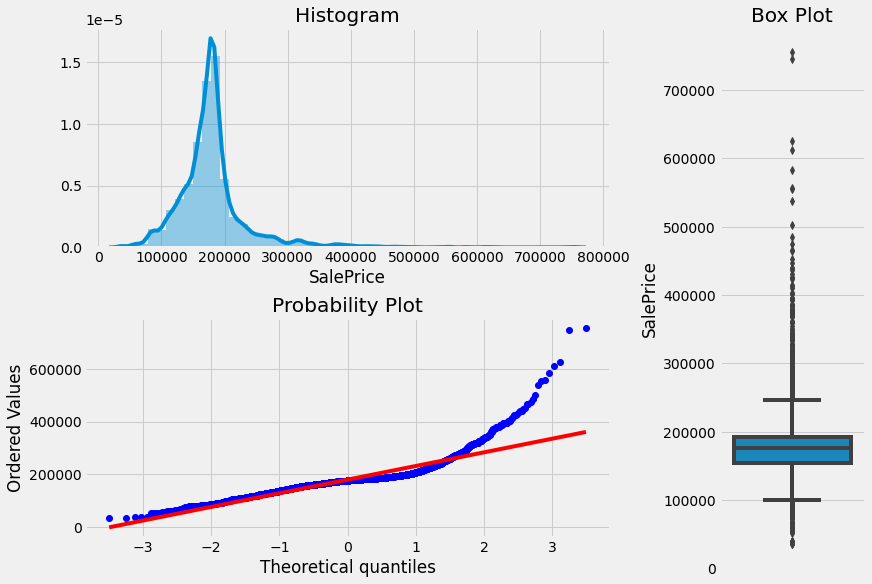

In [27]:
plot_chart(traindf, 'SalePrice')

####These three charts above can tell us a lot about our target variable.

  

*   Our target variable, SalePrice is not normally distributed.
*   Our target variable is right-skewed. 
*   There are multiple outliers in the variable. 

In [28]:
## Getting the correlation of all the features with target variable. 
((traindf.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]).astype('float')

GrLivArea        3.457561e-01
OverallQual      3.035032e-01
TotRmsAbvGrd     2.207120e-01
GarageCars       2.201947e-01
GarageArea       2.160476e-01
1stFlrSF         2.142438e-01
TotalBsmtSF      2.054120e-01
FullBath         1.881048e-01
YearBuilt        1.310919e-01
MasVnrArea       1.264567e-01
Fireplaces       1.250095e-01
YearRemodAdd     1.225223e-01
GarageYrBlt      1.058180e-01
LotFrontage      1.011773e-01
LotArea          8.791016e-02
BsmtFinSF1       7.409407e-02
2ndFlrSF         7.406031e-02
WoodDeckSF       5.682538e-02
OpenPorchSF      5.587373e-02
BedroomAbvGr     5.272101e-02
HalfBath         5.236613e-02
BsmtUnfSF        3.069341e-02
BsmtFullBath     2.196615e-02
MSSubClass       7.728105e-03
ScreenPorch      6.774657e-03
PoolArea         6.567375e-03
KitchenAbvGr     5.149537e-03
EnclosedPorch    4.998233e-03
MoSold           4.518747e-03
OverallCond      4.327639e-03
YrSold           1.526022e-03
3SsnPorch        8.987357e-04
LowQualFinSF     2.370165e-04
BsmtHalfBa

These are the predictor variables sorted in a descending order starting with the most correlated one GrLivArea. Let's put this one in a scatter plot and see how it looks.

#### SalePrice vs GrLivArea

In [0]:
def sctrplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    sns.scatterplot(y = y, x = x);

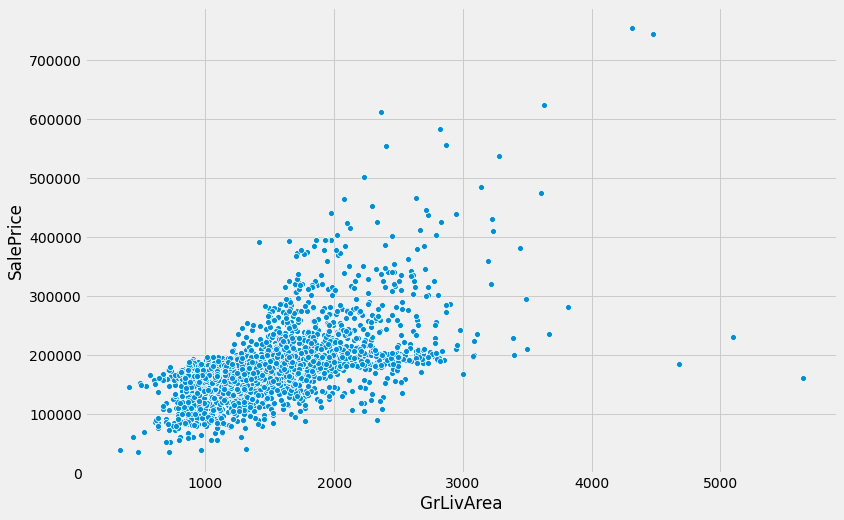

In [30]:
sctrplot(traindf['SalePrice'], traindf['GrLivArea'])

There are two outliers in the plot above which should be removed.

#### SalePrice vs OverallQual

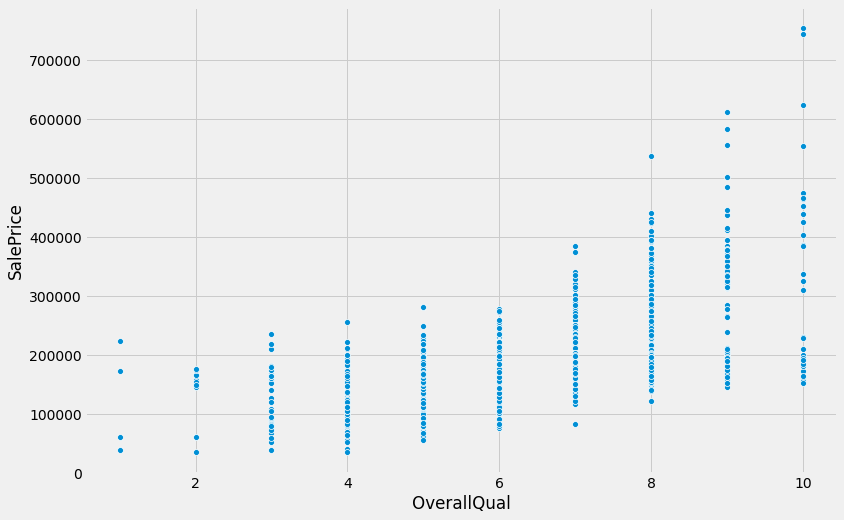

In [31]:
sctrplot(traindf['SalePrice'], traindf['OverallQual'])

OverallQual is a categorical variable, and a scatter plot is not the best way to visualize categorical variables. However, there is an apparent relationship between the two features. The price of the houses increases with the overall quality.

#### SalePrice vs TotRmsAbvGrd 

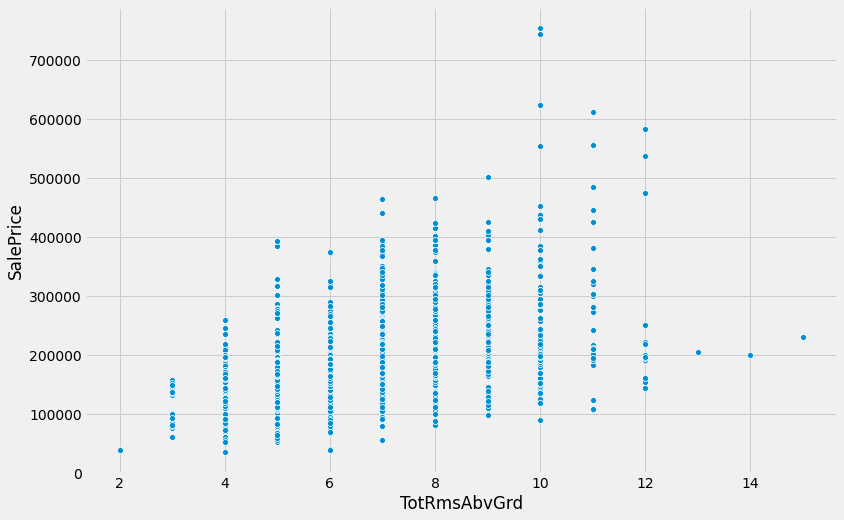

In [32]:
sctrplot(traindf['SalePrice'], traindf['TotRmsAbvGrd'])

#### SalePrice vs GarageCars

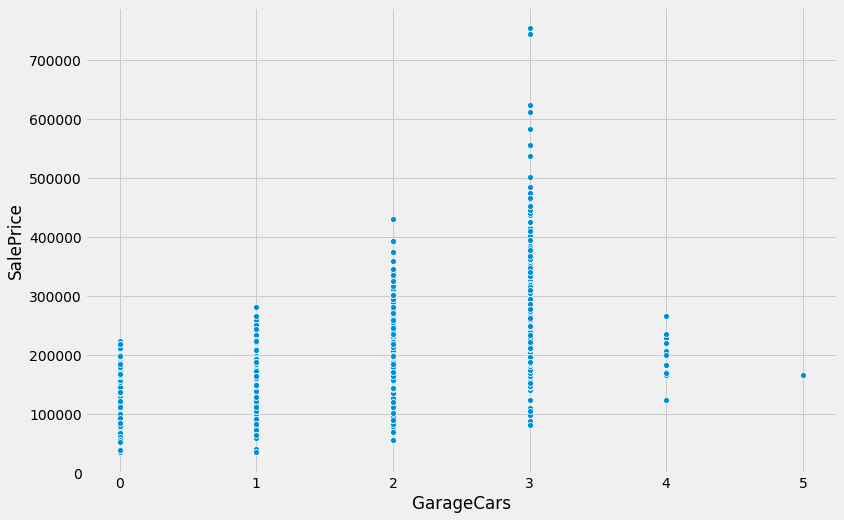

In [33]:
sctrplot(traindf['SalePrice'], traindf['GarageCars'])

#### SalePrice vs GarageArea 

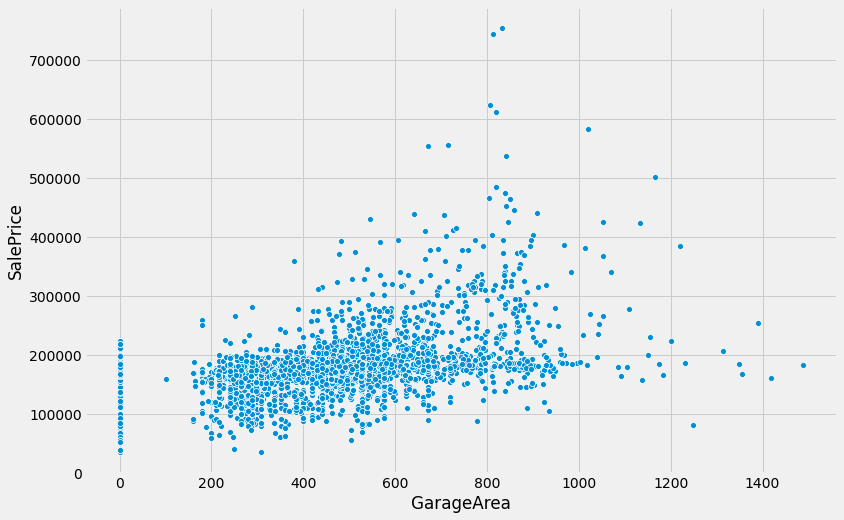

In [34]:
sctrplot(traindf['SalePrice'], traindf['GarageArea'])

#### SalePrice vs 1stFlrSF

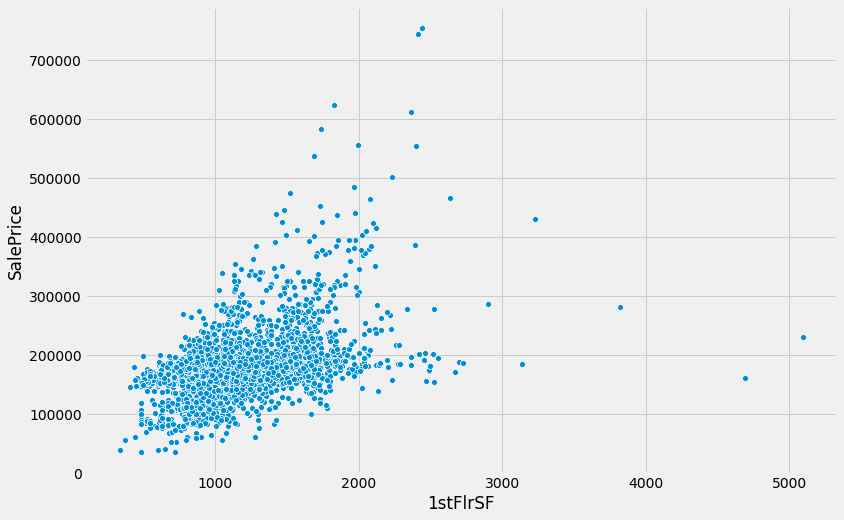

In [35]:
sctrplot(traindf['SalePrice'], traindf['1stFlrSF'])

#### Observations
*   Our target variable shows an unequal level of variance across most predictor(independent) variables. 
*   There are many outliers in the scatter plots above.
*   The two on the top-right edge of SalePrice vs. GrLivArea seem to follow a trend, which can be explained by saying that "As the prices increased, so did the area.
*   However, The two on the bottom right of the same chart do not follow any trends. We will get rid of these two below.

In [0]:
## Deleting those two values with outliers. 
traindf = traindf[traindf.GrLivArea < 4500]
traindf.reset_index(drop = True, inplace = True)

### Checking the linearity of the variables.

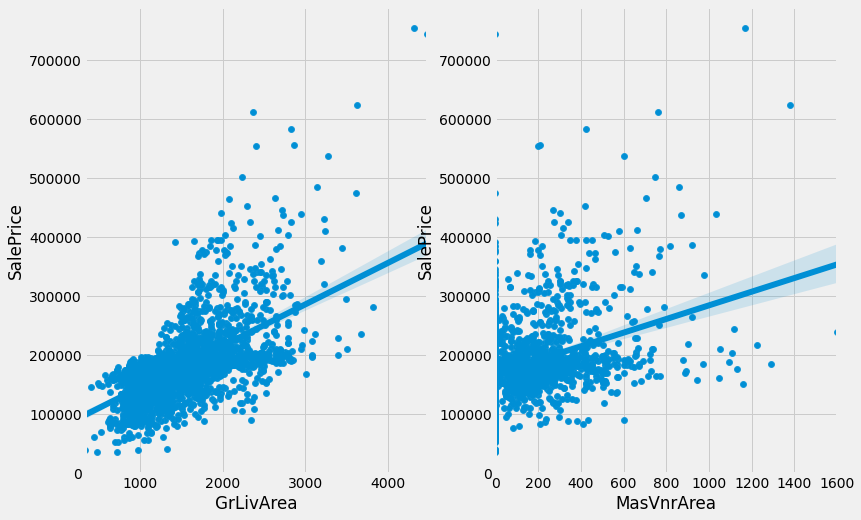

In [37]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = traindf.GrLivArea, y = traindf.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=traindf.GrLivArea, y=traindf.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = traindf.MasVnrArea,y = traindf.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=traindf.MasVnrArea, y=traindf.SalePrice, ax=ax2);

From the chart that there is a better linear relationship between SalePrice and GrLivArea than SalePrice and MasVnrArea. There are some outliers in the dataset. 

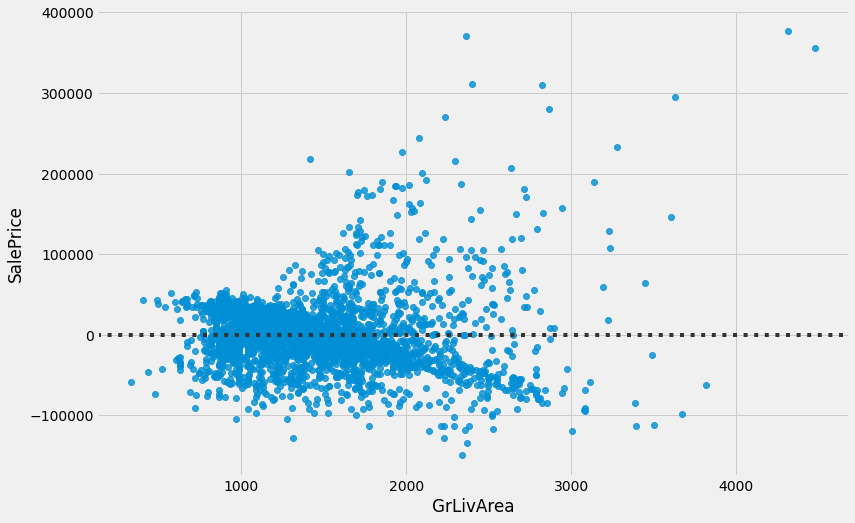

In [38]:
plt.subplots(figsize = (12,8))
sns.residplot(traindf.GrLivArea, traindf.SalePrice)

The error plot shows that as GrLivArea value increases, the variance also increases

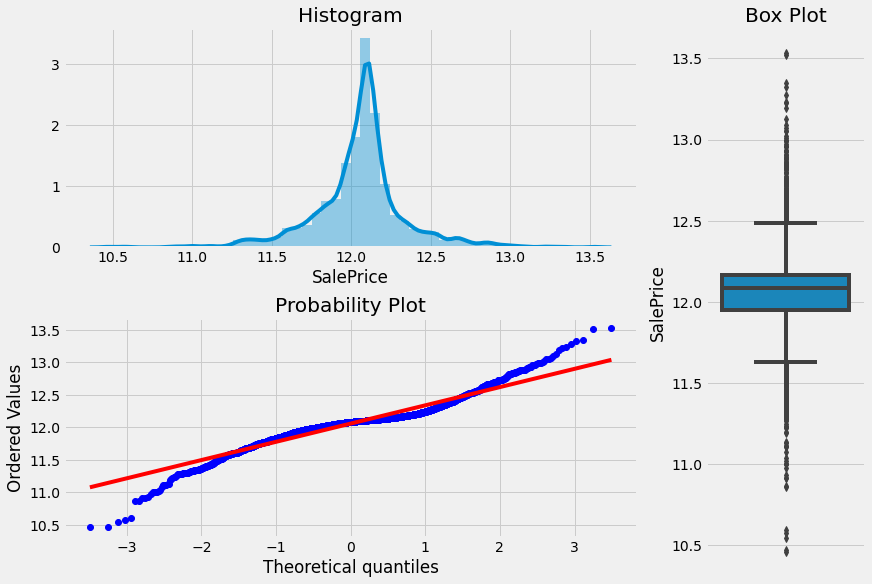

In [39]:
## trainsforming target variable using numpy.log1p, 
traindf["SalePrice"] = np.log1p(traindf["SalePrice"])

## Plotting the newly transformed response variable
plot_chart(traindf, 'SalePrice')

The log transformation removes the normality of errors, which solves most of the other errors seen above. Let's make residual plot again.

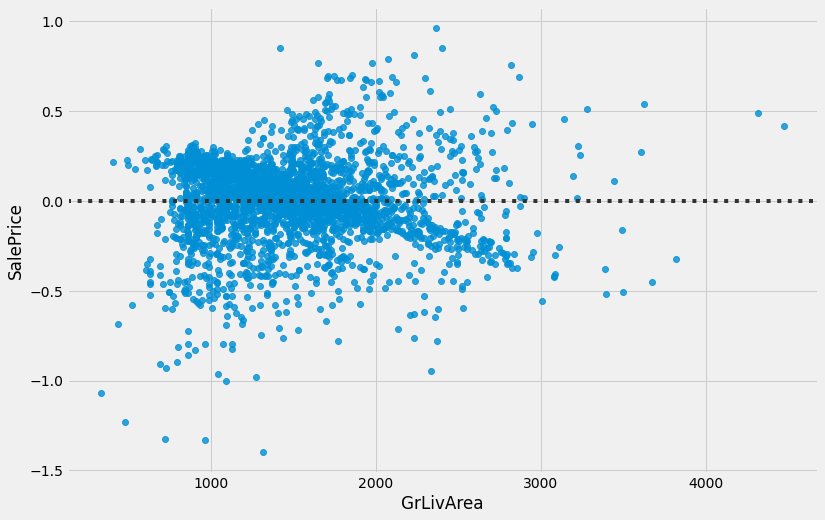

In [40]:
plt.subplots(figsize = (12,8))
sns.residplot(traindf.GrLivArea, traindf.SalePrice)

Heat map showing correlation all features of Ames housing data

Text(0.5, 1.0, 'Heatmap of all the Features')

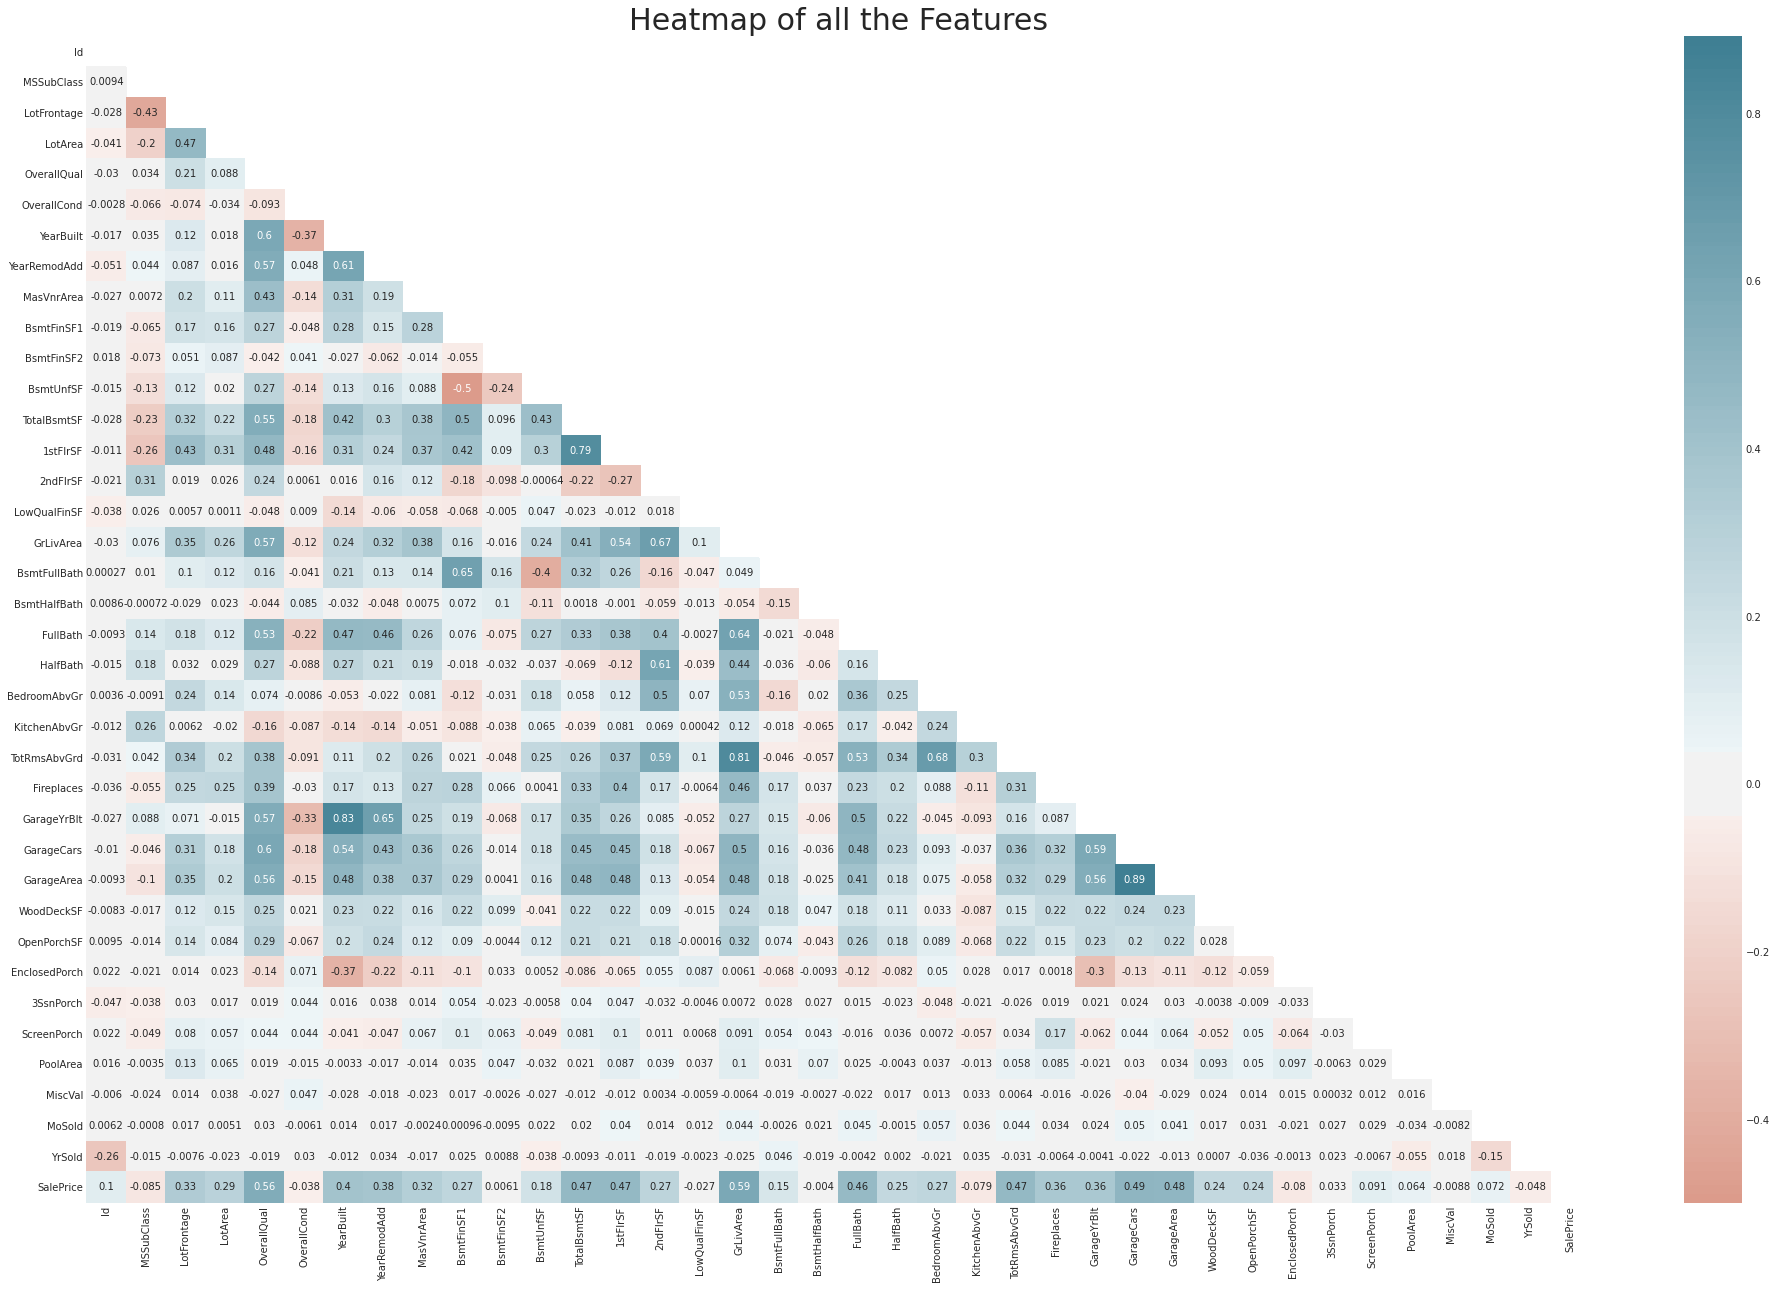

In [41]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(traindf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(traindf.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30)

There is  multicollinearity between various features which can be reduced using regularization regression models. 

### Data Cleaning and Feature Engineering

In [42]:
traindf.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2718
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [0]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    traindf[i] = traindf[i].fillna('None')

In [0]:
## the "OverallCond" and "OverallQual" of the house. 
traindf['OverallCond'] = traindf['OverallCond'].astype(str) 
traindf['OverallQual'] = traindf['OverallQual'].astype(str)
## Zoning class are given in numerical; therefore converted to categorical variables. 
traindf['MSSubClass'] = traindf['MSSubClass'].astype(str)
traindf['MSZoning'] = traindf.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

## Important years and months that should be categorical variables not numerical. 
traindf['YearBuilt'] = traindf['YearBuilt'].astype(str)
traindf['YearRemodAdd'] = traindf['YearRemodAdd'].astype(str)
traindf['GarageYrBlt'] = traindf['GarageYrBlt'].astype(str)
traindf['YearBuilt'] = traindf['YearBuilt'].astype(str)
traindf['YrSold'] = traindf['YrSold'].astype(str)
traindf['MoSold'] = traindf['MoSold'].astype(str) 

In [0]:
traindf['Functional'] = traindf['Functional'].fillna('Typ') 
traindf['Utilities'] = traindf['Utilities'].fillna('AllPub') 
traindf['Exterior1st'] = traindf['Exterior1st'].fillna(traindf['Exterior1st'].mode()[0]) 
traindf['Exterior2nd'] = traindf['Exterior2nd'].fillna(traindf['Exterior2nd'].mode()[0])
traindf['KitchenQual'] = traindf['KitchenQual'].fillna("TA") 
traindf['SaleType'] = traindf['SaleType'].fillna(traindf['SaleType'].mode()[0])
traindf['Electrical'] = traindf['Electrical'].fillna("SBrkr")

In [0]:
### 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 
#'GarageArea' has one or two rows missing. Deleting those rows
traindf.dropna(subset = ['BsmtFinSF1'],axis = 0, inplace = True)
traindf.dropna(subset = ['BsmtFinSF2'],axis = 0, inplace = True)
traindf.dropna(subset = ['BsmtUnfSF'],axis = 0, inplace = True)
traindf.dropna(subset = ['TotalBsmtSF'],axis = 0, inplace = True)
traindf.dropna(subset = ['BsmtFullBath'],axis = 0, inplace = True)
traindf.dropna(subset = ['BsmtHalfBath'],axis = 0, inplace = True)
traindf.dropna(subset = ['GarageCars'],axis = 0, inplace = True)
traindf.dropna(subset = ['GarageArea'],axis = 0, inplace = True)

In [0]:
traindf.drop(['LotFrontage','MasVnrArea'],axis =1,inplace = True)

In [48]:
traindf.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

There are no missing values left.

#### Finding and fixing skewed features

In [49]:
numeric_feats = traindf.dtypes[traindf.dtypes != "object"].index

skewed_feats = traindf[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal          22.168073
PoolArea         17.676417
LotArea          13.304023
LowQualFinSF     12.076090
3SsnPorch        11.364106
KitchenAbvGr      4.297140
BsmtFinSF2        4.141222
EnclosedPorch     4.011468
ScreenPorch       3.941914
BsmtHalfBath      3.941288
OpenPorchSF       2.489641
WoodDeckSF        1.844385
GrLivArea         0.952032
BsmtUnfSF         0.920345
2ndFlrSF          0.861184
1stFlrSF          0.859936
BsmtFinSF1        0.837399
Fireplaces        0.724986
TotRmsAbvGrd      0.707034
HalfBath          0.697681
BsmtFullBath      0.621727
TotalBsmtSF       0.420407
BedroomAbvGr      0.323289
GarageArea        0.212085
FullBath          0.163437
Id                0.001598
SalePrice        -0.149900
GarageCars       -0.218456
dtype: float64

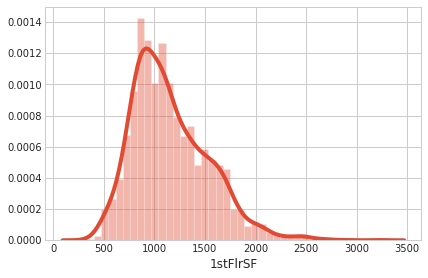

In [50]:
sns.distplot(traindf['1stFlrSF']);

In [51]:
## Fixing Skewed features 


def fixing_skewness(df):
    
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index
    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(traindf)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


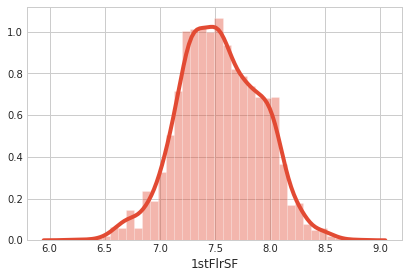

In [52]:
sns.distplot(traindf['1stFlrSF']);

In [53]:
cat_feats = traindf.dtypes[traindf.dtypes == "object"].index
cat_feats

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [0]:
#Deleting unnecessary features
traindf.drop(['Utilities', 'Street', 'PoolQC','MSSubClass', 'MSZoning', 'Alley', 'LotShape', 
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature',
       'MoSold'], axis=1,inplace = True)

### Merging Ames Housing dataset (traindf) and neighborhood dataset (ames_grouped) on 'Neighborhood'

In [0]:
Housedf = pd.merge(traindf,ames_grouped,on = 'Neighborhood')

In [56]:
Housedf.shape

(2261, 158)

In [0]:
Housedf = Housedf.drop(['Neighborhood'], axis=1)

In [58]:
final_df = pd.get_dummies(Housedf).reset_index(drop=True)
final_df.shape

(2261, 327)

#### Extracting target variable 'SalePrice' as y

In [59]:
y = final_df['SalePrice'].reset_index(drop=True)
y.shape

(2261,)

#### Extracting the features as X

In [60]:
X = final_df.drop(['SalePrice'], axis=1)
X.shape

(2261, 326)

In [0]:
# Function for removing overfitting
def overfit_reducer(df):

    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit



In [62]:
overfitted_features = overfit_reducer(X)
overfitted_features


['YearBuilt_1872',
 'YearBuilt_1875',
 'YearBuilt_1879',
 'YearBuilt_1882',
 'YearBuilt_1893',
 'YearBuilt_1896',
 'YearBuilt_1898',
 'YearBuilt_1902',
 'YearBuilt_1904',
 'YearBuilt_1906',
 'YearBuilt_1907',
 'YearBuilt_1908',
 'YearBuilt_1911',
 'YearBuilt_1913']

In [0]:
X = X.drop(overfitted_features, axis=1)

In [0]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [65]:
X.shape

(2256, 312)

### Training and fitting model

#### Train Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

#### Using Multiple Linear Regression

In [0]:
lr = LinearRegression(normalize=True, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [68]:
r2 = r2_score(y_test, y_pred) # r2 score
mse = mean_squared_error(y_test, y_pred) # mse
print("R2 score using Ridge Regression:", r2)
print("MSE using Ridge Regression:", mse)

R2 score using Ridge Regression: 0.4242081819456648
MSE using Ridge Regression: 0.05467762478962617


Using the simpler Multiple Linear Regression, R2 score is not that good because of the multicollinearity. So lets use advanced regularisation algorithms to solve the same.

In [0]:
param =[{'alpha' : [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]}]

In [70]:
# Using Ridge Regression
RR = Ridge(normalize=True)
Reg = GridSearchCV(RR,param,cv=5)
Reg.fit(X_train, y_train)
scores = Reg.cv_results_['mean_test_score']

print("Best score is ", Reg.best_score_)
print('Best value for alpha is ', Reg.best_estimator_.alpha)

model = Ridge(alpha =Reg.best_estimator_.alpha, normalize = True )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred) # r2 score
mse = mean_squared_error(y_test, y_pred) # mse
print("R2 score using Ridge Regression:", r2)
print("MSE using Ridge Regression:", mse)


Best score is  0.46786299065647735
Best value for alpha is  1.5
R2 score using Ridge Regression: 0.4709464582922259
MSE using Ridge Regression: 0.05023932285955259


In [71]:
# Using Lasso Regression
Las = Lasso(normalize=True)
Reg = GridSearchCV(Las,param,cv=5)
Reg.fit(X_train, y_train)
scores = Reg.cv_results_['mean_test_score']

print("Best score is ", Reg.best_score_)
print('Best value for alpha is ', Reg.best_estimator_.alpha)

model = Ridge(alpha =Reg.best_estimator_.alpha, normalize = True )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred) # r2 score
mse = mean_squared_error(y_test, y_pred) # mse
print("R2 score using Lasso Regression:", r2)
print("MSE using Lasso Regression:", mse)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.210447977195, tolerance: 0.01185741409119235
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.916100550295358, tolerance: 0.011765723296515509
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.79925715479872, tolerance: 0.012165503238085696
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.93

Best score is  0.4528779335425945
Best value for alpha is  0.0001
R2 score using Lasso Regression: 0.4245855427352281
MSE using Lasso Regression: 0.05464179032478125


In [72]:
# Using ElasticNet Regression
Ela = ElasticNet(normalize=True)
Reg = GridSearchCV(Ela,param,cv=5)
Reg.fit(X_train, y_train)
scores = Reg.cv_results_['mean_test_score']

print("Best score is ", Reg.best_score_)
print('Best value for alpha is ', Reg.best_estimator_.alpha)

model = Ridge(alpha =Reg.best_estimator_.alpha, normalize = True )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred) # r2 score
mse = mean_squared_error(y_test, y_pred) # mse
print("R2 score using ElasticNet Regression:", r2)
print("MSE using ElasticNet Regression:", mse)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.210461344273387, tolerance: 0.01185741409119235
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.91611998714649, tolerance: 0.011765723296515509
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.799274936249194, tolerance: 0.012165503238085696
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21

Best score is  0.4678195336693733
Best value for alpha is  0.001
R2 score using ElasticNet Regression: 0.4249894964228804
MSE using ElasticNet Regression: 0.054603430578301214


Using Ridge, Lasso and Elasticnet individually has also not increased so much. Lets try blended models of Ridge, Lasso, elasticnet, Support Vector Regression (SVR),  Lgbmregressor and StackingCVRegressor

In [0]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


In [0]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [0]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                                              alphas=alphas2, 
                                              random_state=42, 
                                              cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [0]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [0]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [0]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [79]:
print('Training the various regression algorithms\n')
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))

print('elasticnet')
elastic_model = elasticnet.fit(X_train, y_train)

print('Lasso')
lasso_model = lasso.fit(X_train, y_train)

print('Ridge') 
ridge_model = ridge.fit(X_train, y_train)

print('Svr')
svr_model = svr.fit(X_train, y_train)

print('xgboost')
xgb_model = xgboost.fit(X_train, y_train)

print('lightgbm')
lgb_model = lightgbm.fit(X_train, y_train)

Training the various regression algorithms

stack_gen
[07:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
elasticnet
Lasso
Ridge
Svr
xgboost
[07:54:52] WARNING: /w

In [0]:
def blend_models_predict(X_test):
    return ((0.1 * elastic_model.predict(X_test)) + \
            (0.05 * lasso_model.predict(X_test)) + \
            (0.2 * ridge_model.predict(X_test)) + \
            (0.1 * svr_model.predict(X_test)) + \
            (0.15 * xgb_model.predict(X_test)) + \
            (0.1 * lgb_model.predict(X_test)) + \
            (0.3 * stack_gen_model.predict(np.array(X_test))))

In [0]:
y_pred = blend_models_predict(X_test)

### Results

In [82]:
r2 = r2_score(y_test, y_pred) # r2 score
mse = mean_squared_error(y_test, y_pred) # mse
print("R2 score using Blended models:", r2)
print("MSE using Blended models:", mse)

R2 score using Blended models: 0.7925085159399344
MSE using Blended models: 0.019703547630835504





*   R2 score is 0.79 which shows a strong correlation between Sale Price and other features 



Using Linear Regression we got very low R2 score 0.42. A blended model of Ridge, Lasso, Elasticnet, SVR, XGBRegressor, LGBMRegressor and StackingCVRegressor to get a R2 score of 0.79 and Mean Squared Error of 0.019.The model has good accuracy and a low error. 79% R2 score means the model is able to explain 79% of the      response data around its mean. 


### DISCUSSION
There is almost 37% improvement in model by using advanced regression algorithms. But there is still variance that the model could not explain. There are    features and    but the data set contained only  samples. More dataset can help training the model better. Some features are to be dropped to reduce the number of features in the data set. In the neighbourhood data some approximations are done to find the location details of nearby areas. For linear regression problems, normal distribution, skewness and outliers play an important role in creating accuracy. These problems are solved to a great extent by transformation methods. More advanced methods need to be used for greater precision. More data, larger number of datasets, would help improve model performances significantly.


### CONCLUSION
Following steps are followed in this project:  
•	Identifying business problem which is creating a model for predicting housing sales price for Ames, Iowa considering all the important features including the neighbourhood venues  
•	Sourcing data  required for the project  
•	Cleaning dataset   
•	Analysing the data using various visualisation and statistical techniques   
•	Feature engineering to optimise the model   
•	Training and fitting the model   
•	Analysing the model Recommendations for ways to improve 

House aspirants, Real estate people, city planners and house sellers, target audience of this project, can use the model to accurately predict housing sale price of Ames, Iowa. 
